## Forest Types

### Types of forests in Malawi vs Location of planted forests

- The study objectives were to determine whether forest type influenced the choice of where to plant trees.
- Findings: Tropical mountain systems were the most common sites for tree planting
- Hypothesis: The government is trying to restore the highland and mountain tree populations.


In [1]:
import warnings
warnings.filterwarnings("ignore")
import geopandas as gdp
import pandas as pd 
import matplotlib.pyplot as plt
#Load data of Malawi planted forests and forest type
forests_type = gdp.read_file("MWI_AL2_Malawi_GEZ.json")
forests_planted = gdp.read_file("MWI_Malawi_SDPT.json")

In [3]:
#Display featured data
forests_planted.head()

final_id  iso country org_name common_name  species species_simp  \
0  MWI_7215  MWI  Malawi  Orchard     Unknown  Unknown      Unknown   
1  MWI_7215  MWI  Malawi  Orchard     Unknown  Unknown      Unknown   
2  MWI_7215  MWI  Malawi  Orchard     Unknown  Unknown      Unknown   
3  MWI_7215  MWI  Malawi  Orchard     Unknown  Unknown      Unknown   
4  MWI_7215  MWI  Malawi  Orchard     Unknown  Unknown      Unknown   

     plant_ag   timber_ag ever_dec conifer_broad hard_soft     size  \
0  Tree crops  Tree crops      n/a           n/a       n/a  Unknown   
1  Tree crops  Tree crops      n/a           n/a       n/a  Unknown   
2  Tree crops  Tree crops      n/a           n/a       n/a  Unknown   
3  Tree crops  Tree crops      n/a           n/a       n/a  Unknown   
4  Tree crops  Tree crops      n/a           n/a       n/a  Unknown   

            source     year                                           geometry  
0  Open street map  Unknown  POLYGON ((34.94842 -16.56551, 34.94843 -16.565...  
1  Open street map  Unknown  POLYGON ((35.15622 -16.41197, 35.15489 -16.411...  
2  Open street map  Unknown  POLYGON ((35.10328 -16.00478, 35.10343 -16.004...  
3  Open street map  Unknown  POLYGON ((35.62414 -15.98947, 35.62409 -15.989...  
4  Open street map  Unknown  POLYGON ((35.66587 -15.81957, 35.66573 -15.819...

<AxesSubplot:>

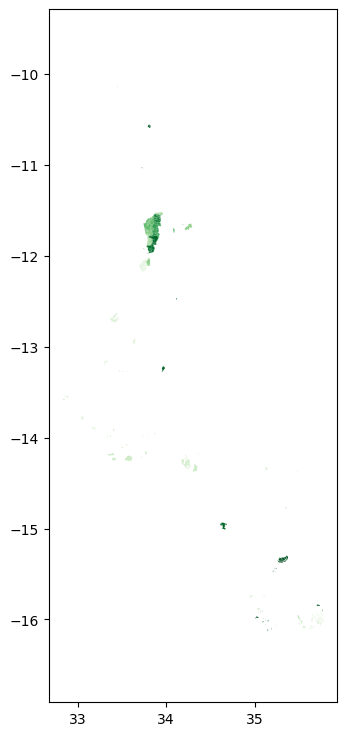

In [4]:
#Plot the skeleton map of the forests
forests_planted.plot(figsize=(13, 9), cmap='Greens')

<AxesSubplot:>

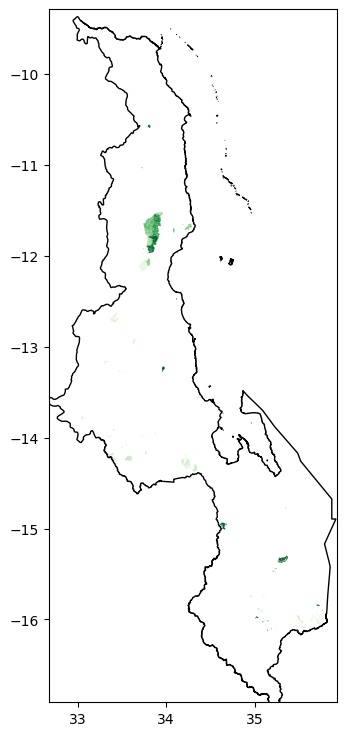

In [5]:
#Incorporate Malawi's boundaries
ax = forests_planted.plot(markersize=10, figsize=(13, 9), cmap='Greens')
plt.autoscale(False)
malawi = gdp.read_file("MWI_AL2_Malawi.json")
malawi.plot(ax=ax, color="none", edgecolor="black")

In [6]:
#Determine forests distribution across the country
r_tree = forests_planted.sindex
print(r_tree)

rtree.index.Index(bounds=[32.8240109831, -16.5655758, 35.7844368356, -9.6325822527], size=1443)


In [7]:
for leaf in r_tree.leaves()[:2]:
    idxs, indices, bbox = leaf
    print(f'-> points in box {idxs}: ',  indices, '\n bounding box: ', bbox, '\n')
print(f"number of leaves: {len(r_tree.leaves())}")

-> points in box 0:  [358, 346, 344, 337, 357, 360, 356, 345, 338, 343, 359, 355, 348, 374, 354, 362, 339, 361, 373, 347, 353, 341, 352, 340, 351, 342, 334, 350, 349, 366, 367, 375, 323, 365, 330, 377, 364, 331, 376, 329, 328, 327, 383, 363, 379, 378, 382, 381, 380, 391, 390, 389, 388, 387, 386, 385, 384, 232, 230, 231, 222, 224, 223, 237, 236, 233, 226, 227, 228, 229] 
 bounding box:  [32.8240109831, -14.2605316324, 33.7839343107, -12.6725519582] 

-> points in box 2:  [225, 234, 235, 66, 202, 67, 154, 153, 110, 109, 147, 201, 146, 200, 145, 199, 144, 198, 143, 197, 196, 104, 221, 195, 142, 194, 220, 152, 219, 193, 217, 151, 218, 113, 192, 150, 216, 215, 191, 213, 214, 190, 148, 121, 210, 114, 149, 212, 187, 186, 638, 189, 185, 141, 209, 184, 188, 211, 103, 617, 621, 204, 112, 111, 183, 208, 205, 203, 206, 182] 
 bounding box:  [33.392703468, -12.6886620474, 33.7929517793, -12.0631819498] 

number of leaves: 21


(32.67598969047501, 35.932458128224994, -16.912225477365002, -9.285932575335)

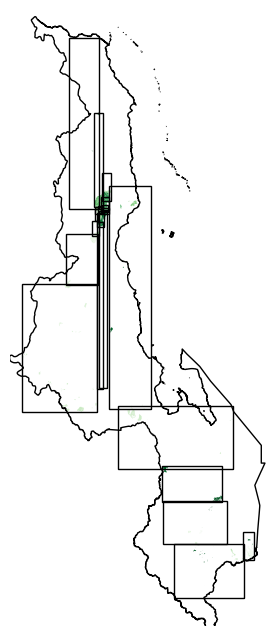

In [9]:
import shapely.geometry
from descartes import PolygonPatch
ax = forests_planted.plot(markersize=.1, figsize=(12, 8), cmap='Greens')
plt.autoscale(False)
for leaf in r_tree.leaves()[:200]:
    idxs, indices, bbox = leaf
    r_box = shapely.geometry.box(*bbox)
    box_patch = PolygonPatch(r_box, fc='None', ec='k')
    ax.add_patch(box_patch)
malawi.plot(ax=ax, color="none", edgecolor='black')
ax.axis('off')

In [11]:
forests_planted = forests_planted[["final_id", "iso", "country", "org_name", "plant_ag", "geometry"]].fillna(0)

In [12]:
#A different visualization of forests location
forests_planted.explore(location=[-14.25327, 35.14234], zoom_start=6.4)

In [13]:
#Types of forest in Malawi
forests_type.head()

country ISO3166_2    name                  gez_name  gez_code gez_abbrev  \
0     MWI            Malawi       Tropical dry forest        13       TAwb   
1     MWI            Malawi     Tropical moist forest        12       TAwa   
2     MWI            Malawi  Tropical mountain system        16         TM   
3     MWI            Malawi                     Water        90      Water   

   adminlevel                                           geometry  
0           2  MULTIPOLYGON (((35.87210 -14.67562, 35.85895 -...  
1           2  MULTIPOLYGON (((35.28032 -14.32751, 35.28000 -...  
2           2  MULTIPOLYGON (((35.59427 -16.07046, 35.65497 -...  
3           2  MULTIPOLYGON (((35.14234 -14.25327, 35.14319 -...

In [14]:
gdf = forests_type[["name", "gez_name", "gez_code", "geometry"]].fillna(0)

In [16]:
#Map of forest types
import folium
folium.Choropleth(highlight=True,
    geo_data=forests_type,
    name='choropleth',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,)
m = gdf.explore(location=[-14.25327, 35.14234], column="gez_name", name="Gez Name", zoom_start=5.5)
folium.LayerControl().add_to(m)
m

When compared; trees were planted more in Tropical mountain systems than any other forest type.

### References 

- Restoration Resource Center. Restoration Resource Center - Ibrahim Mitole. Available at: https://www.ser-rrc.org/resource/restoring-the-forests-of-mulanje-mountain-securing-a-future-for-a-critically-endangered-tree-and-providing-jobs-for-more-than-500-people/ (Accessed: October 27, 2022). 